In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
train = pd.read_csv("/content/drive/MyDrive/uptrain.csv")
test =  pd.read_csv("/content/drive/MyDrive/newtest.csv")

In [139]:
train.head()

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,loan_origination_date,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,scorex,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,...,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield
0,BFE35133851509F7BC64,11792740,2020-11-09 14:00:26.923000000,2020-11-09 14:01:26.670000000,2020-11-06 12:46:28.507000000,2020-11-10 00:00:00,6,Completed,6.0,Employed,339.0,4,700-719,CO,Loveland,1,False,2,18000.0,5746.78,4583.3333,NaN,Clerical,NaN,NaN,NaN,10000.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.0,16.0,16.0,0.0,...,-0.5,-3.0,291985.0,999.0,0.0,0.0,1.0,19.0,658.0,8.0,0.0,6318.0,3378.0,30.0,570.0,8.0,0.0,1532.0,1139.0,17086.0,44.0,170.0,0.0,0.0,25246.0,68343.0,2542.0,-1.0,663.0,1578.0,301.0,-4.0,1.0,84538.0,964.0,516.0,4786.0,227.0,104.0,0.1724
1,5EC41638536573FF4C50,11792743,2020-11-09 11:47:49.500000000,2020-11-09 11:50:06.830000000,2020-11-06 12:46:48.523000000,2020-11-10 00:00:00,6,Completed,9.0,Employed,134.0,4,680-699,PA,Red Lion,0,False,1,20000.0,0.00,5833.3333,NaN,Other,NaN,NaN,NaN,20000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.0,14.0,14.0,0.0,...,85.0,85.0,140983.0,999.0,0.0,0.0,1.0,40.0,1139.0,999.0,0.0,13665.0,2833.0,74.0,1914.0,999.0,0.0,7655.0,2859.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2147.0,-1.0,458.0,1215.0,474.0,-4.0,-1.0,176420.0,2147.0,2086.0,6010.0,255.0,596.0,0.0974
2,4CDA9349504903DF236,11805921,2020-11-09 11:48:52.527000000,2020-11-09 11:49:11.947000000,2020-11-06 12:48:59.127000000,2020-11-13 00:00:00,6,Completed,7.0,Employed,8.0,4,680-699,VA,Richmond,0,False,1,6915.0,0.00,4999.6667,NaN,Other,NaN,NaN,NaN,6915.0,6915.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13.0,5.0,5.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,78.0,1517.0,54.0,0.0,3034.0,1950.0,-3.0,-3.0,57.0,-3.0,-2.0,0.0,9456.0,53.0,-1.0,5.0,0.0,0.0,9456.0,715.0,-1.0,633.0,-1.0,82.0,-4.0,-7.0,30930.0,715.0,404.0,3034.0,82.0,-2.0,0.1324
3,2541374793835134045AB2D,11805933,2020-11-09 14:00:45.527000000,2020-11-09 14:01:26.583000000,2020-11-06 12:52:05.760000000,2020-11-10 00:00:00,6,Completed,5.0,Other,398.0,5,680-699,CA,CATHEDRAL CTY,1,False,2,17000.0,1303.24,6250.0000,NaN,Teacher,NaN,NaN,NaN,12000.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.0,11.0,11.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,80.0,4431.0,999.0,0.0,43513.0,5528.0,53.0,2974.0,999.0,0.0,9582.0,5659.0,50035.0,999.0,123.0,0.0,0.0,-5.0,50035.0,1513.0,-1.0,163.0,-1.0,1350.0,-4.0,-1.0,95103.0,1513.0,1043.0,33931.0,1048.0,680.0,0.2174
4,95DE3430103568DDD710,11688122,2020-12-09 08:00:55.467000000,2020-12-09 08:08:20.907000000,2020-12-08 07:14:11.217000000,NaN,7,Cancelled,8.0,Employed,52.0,3,760-779,NM,LOS LUNAS,0,False,0,NaN,NaN,3166.6667,NaN,Military Enlisted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,26.0,1164.0,999.0,0.0,2327.0,4500.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,487.0,-1.0,445.0,-1.0,42.0,-4.0,-1.0,5001.0,487.0,445.0,2327.0,42.0,-2.0,0.1379


In [140]:
test.head()

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,loan_origination_date,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,scorex,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,...,IN12S,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24
0,33AC39688222827E390,12427261,2021-07-22 14:01:34.677000000,2021-07-22 14:08:27.880000000,2021-07-22 10:16:40.510000000,NaN,7,Cancelled,9.0,Employed,6.0,3,740-759,IL,ROCKFORD,0,False,0,NaN,NaN,2666.6667,NaN,Self Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,14,14,1,...,6,-1.0,-1.0,-1,-1,-1,-1,2,7,444,35,0,3555,6363,0,0,999,0,0,0,922,999,214,0,0,-5,4611,814,-1,689,-1,125,-4,-7,31972,814,689,3555,125,0
1,4C094351423072700370,12437697,2021-07-27 14:02:49.027000000,2021-07-27 14:07:11.803000000,2021-07-22 10:14:40.853000000,2021-07-28 00:00:00,6,Completed,11.0,Employed,145.0,6,800-819,CA,Temecula,0,False,2,37600.0,0.0,13750.0000,NaN,Executive,NaN,NaN,NaN,20000.0,17600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25,11,11,0,...,2,-0.5,-3.0,404234,999,0,0,0,0,24,999,0,194,13813,0,0,999,0,0,0,-1,-1,-1,-1,-1,-1,-1,3732,-1,2034,1683,15,-4,-1,450125,3732,15527,194,15,9306
2,27D32544574226266F6,12437757,2021-07-22 15:00:30.887000000,2021-07-22 15:07:42.790000000,2021-07-22 10:47:19.107000000,2021-07-27 00:00:00,6,Completed,1.0,Employed,30.0,3,640-659,NV,NORTH LAS VEGAS,0,False,0,NaN,NaN,3333.3333,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,6,2,...,2,-1.0,-1.0,-1,-1,-1,-1,0,61,433,999,0,1730,713,53,279,999,0,557,374,-1,-1,-1,-1,-1,-1,-1,593,-1,450,-1,143,-4,-1,4585,593,1128,1173,86,510
3,0D73-124519137994AAD2,11983349,2021-03-17 08:00:35.753000000,2021-03-17 08:07:24.900000000,2021-03-16 12:12:14.507000000,2021-03-22 00:00:00,6,Completed,9.0,Employed,34.0,4,740-759,ID,Boise,0,True,0,NaN,NaN,4583.3333,NaN,Executive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,5,1,...,2,97.0,97.0,224803,999,0,0,7,29,1450,999,0,1450,5000,-3,-3,999,-3,-2,0,10149,999,127,0,0,-5,10149,1715,-1,274,1325,29,-4,-1,257757,1715,1599,1450,29,0
4,D1B33746576749711046C8F,11983343,2021-03-22 14:00:59.117000000,2021-03-22 14:07:33.877000000,2021-03-16 12:09:41.330000000,2021-03-23 00:00:00,6,Completed,8.0,Employed,116.0,6,720-739,NY,Ronkonkoma,1,False,2,55000.0,21709.2,10000.0000,NaN,Police Officer/Correction Officer,NaN,NaN,NaN,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,27,13,13,1,...,2,98.0,98.0,309897,999,0,0,0,45,4434,999,0,44337,9959,67,7214,999,0,14427,11725,-3,999,-1,0,-3,-5,-2,4925,-1,1179,2617,1129,-4,-1,385703,4925,9036,29910,707,4633


In [141]:
train.corr()

,listing_number,listing_status,prosper_score,months_employed,income_range,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,scorex,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,AU20S,BC01S,BC02S,...,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield
listing_number,1.000000,-0.026448,0.103099,0.003471,-0.052258,0.010193,0.015885,0.024674,-0.009895,-0.007910,-0.041362,NaN,NaN,NaN,NaN,-0.030649,-0.035889,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,-0.048297,-0.000592,-0.006350,-0.005753,-0.104953,-0.034902,-0.005836,-0.028314,-0.029763,-0.027634,-0.010962,-0.027378,-0.027597,-0.008780,-0.000470,0.002537,...,-0.038966,-0.041696,-0.024512,-0.016336,-0.026178,0.000247,-0.010635,-0.056419,-0.050676,0.010054,0.000073,-0.049326,-0.035094,-0.019411,-0.020967,0.004023,-0.006036,-0.025904,-0.023877,0.008938,0.007689,0.020695,0.005114,-0.003634,0.009244,0.011796,-0.046144,-0.019459,-0.057069,-0.062489,-0.059849,0.001318,0.011953,-0.035825,-0.078797,0.015185,-0.062314,-0.053568,-0.011378,-0.087855
listing_status,-0.026448,1.000000,-0.039718,-0.036071,0.015072,-0.036481,0.003761,-0.059679,-0.003536,0.003312,0.059720,NaN,NaN,NaN,NaN,-0.009151,0.002406,NaN,NaN,NaN,NaN,NaN,NaN,-0.001057,-0.001516,-0.022896,-0.002173,-0.002090,0.030883,0.030698,-0.002052,0.001330,0.012090,0.018558,-0.000132,0.010200,0.018551,-0.034181,0.003329,0.008155,...,-0.009111,-0.009688,-0.002711,-0.026931,-0.027939,0.000332,-0.002530,0.011330,-0.004148,-0.013687,0.008529,0.001080,-0.021162,0.011642,-0.000079,-0.011325,-0.003915,0.001457,-0.000461,-0.010465,-0.025110,-0.023053,0.001875,0.000533,0.000179,-0.009400,-0.001902,0.000697,-0.012937,-0.033340,-0.003493,0.003130,0.002698,-0.001530,-0.029229,-0.012475,-0.004580,-0.006829,0.006180,0.051338
prosper_score,0.103099,-0.039718,1.000000,0.044522,0.154543,-0.001802,0.037012,0.035610,0.090407,0.025202,0.080826,NaN,NaN,NaN,NaN,0.144887,0.107132,NaN,NaN,NaN,NaN,NaN,NaN,0.023104,-0.013376,0.104651,0.059122,0.059383,-0.065469,-0.052453,0.058488,0.062724,0.008548,-0.024322,0.014220,0.008139,-0.024617,0.077937,0.115059,0.091658,...,0.055706,0.063658,0.142315,0.152981,0.082412,-0.009236,0.033287,-0.414787,-0.045959,0.129227,0.000075,-0.048486,0.253133,-0.233901,-0.096797,0.104905,-0.037995,-0.120852,-0.091485,0.043040,0.076647,0.043041,-0.045386,-0.010219,-0.026566,0.036011,0.026223,0.009881,0.024246,0.142318,-0.140051,0.000886,-0.028966,0.133245,0.071377,0.068911,-0.074214,-0.125456,0.088629,-0.717469
months_employed,0.003471,-0.036071,0.044522,1.000000,0.102238,0.038837,-0.003542,0.097204,0.037581,-0.007905,0.046028,NaN,NaN,NaN,NaN,0.082990,0.030270,NaN,NaN,NaN,NaN,NaN,NaN,0.016622,0.058423,0.157600,0.101575,0.100196,-0.007433,0.013666,0.100119,0.101547,0.034750,-0.019792,0.039310,0.019612,-0.019797,0.176623,0.128162,0.101295,...,0.122804,0.125226,0.078315,0.126413,0.172095,0.001663,0.086744,0.021017,0.054666,-0.018131,0.001612,0.107669,0.067509,0.022125,0.042499,0.033262,0.011838,0.082535,0.070058,-0.041152,-0.103426,-0.085891,-0.037027,-0.006013,-0.017941,-0.065807,0.068440,0.049544,0.105757,0.106686,0.129751,-0.003558,-0.017621,0.087052,0.145226,0.027772,0.104789,0.107651,0.036197,-0.035650
income_range,-0.052258,0.015072,0.154543,0.102238,1.000000,0.058990,-0.036729,0.114054,0.192554,0.074884,0.442231,NaN,NaN,NaN,NaN,0.467267,0.365143,NaN,NaN,NaN,NaN,NaN,NaN,0.046660,0.115688,0.335868,0.277577,0.2

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103168 entries, 0 to 103167
Columns: 130 entries, member_key to lender_yield
dtypes: bool(1), float64(113), int64(5), object(11)
memory usage: 101.6+ MB


In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80957 entries, 0 to 80956
Columns: 129 entries, member_key to CV24
dtypes: bool(1), float64(21), int64(96), object(11)
memory usage: 79.1+ MB


# Filling Missing Values
the missing values are filled with mean for continous and integer values while the string values are filled with mode(highest frequency) which is the best statistical way

In [145]:
#checking the most frequent(mode) values in the columns-
train["loan_origination_date"].value_counts().head()

2020-10-14 00:00:00    901
2020-02-19 00:00:00    899
2020-04-01 00:00:00    895
2020-01-22 00:00:00    770
2020-03-17 00:00:00    759
Name: loan_origination_date, dtype: int64

In [146]:
train["listing_end_date"].value_counts().head()

2020-07-13 14:01:06    7
2020-04-16 14:18:19    7
2020-09-20 11:08:01    7
2020-05-11 08:04:18    6
2020-04-28 16:58:22    6
Name: listing_end_date, dtype: int64

In [147]:
train["borrower_state"].value_counts().head(2)

CA    13259
TX     8853
Name: borrower_state, dtype: int64

In [148]:
train["borrower_city"].value_counts().head(2)

Chicago      589
Las Vegas    562
Name: borrower_city, dtype: int64

In [149]:
#filling the null values
train["loan_origination_date"].fillna("2020-10-14 00:00:00 ",inplace=True)
train["listing_end_date"].fillna("2020-07-13 14:01:06",inplace=True)
train["prosper_score"].fillna(train["prosper_score"].mean(),inplace=True)
train["borrower_state"].fillna("CA",inplace=True)
train["borrower_city"].fillna("Chicago",inplace=True)
train["months_employed"].fillna(train["months_employed"].mean(),inplace=True)

In [150]:
test["loan_origination_date"].value_counts().head(3)

2021-02-17 00:00:00    978
2021-08-10 00:00:00    721
2021-08-03 00:00:00    677
Name: loan_origination_date, dtype: int64

In [151]:
test["listing_end_date"].value_counts().head(3)

2021-03-07 06:05:05    19
2021-05-11 14:07:05     5
2021-01-24 17:14:27     5
Name: listing_end_date, dtype: int64

In [152]:
test["loan_origination_date"].fillna("2021-02-17 00:00:00",inplace=True)
test["prosper_score"].fillna(test["prosper_score"].mean(),inplace=True)
test["months_employed"].fillna(test["months_employed"].mean(),inplace=True)
test["listing_end_date"].fillna("2021-03-07 06:05:05",inplace=True)

In [153]:
train.fillna(0,axis=1, inplace=True)

In [74]:
train.isnull().sum()

member_key               0
listing_number           0
listing_start_date       0
listing_end_date         0
listing_creation_date    0
                        ..
CV21                     0
CV22                     0
CV23                     0
CV24                     0
lender_yield             0
Length: 129, dtype: int64

In [75]:
test.isnull().sum()

member_key               0
listing_number           0
listing_start_date       0
listing_end_date         0
listing_creation_date    0
                        ..
CV20                     0
CV21                     0
CV22                     0
CV23                     0
CV24                     0
Length: 128, dtype: int64

##  Data analysis, Visualization, Exploration and Preprocessing

In [154]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


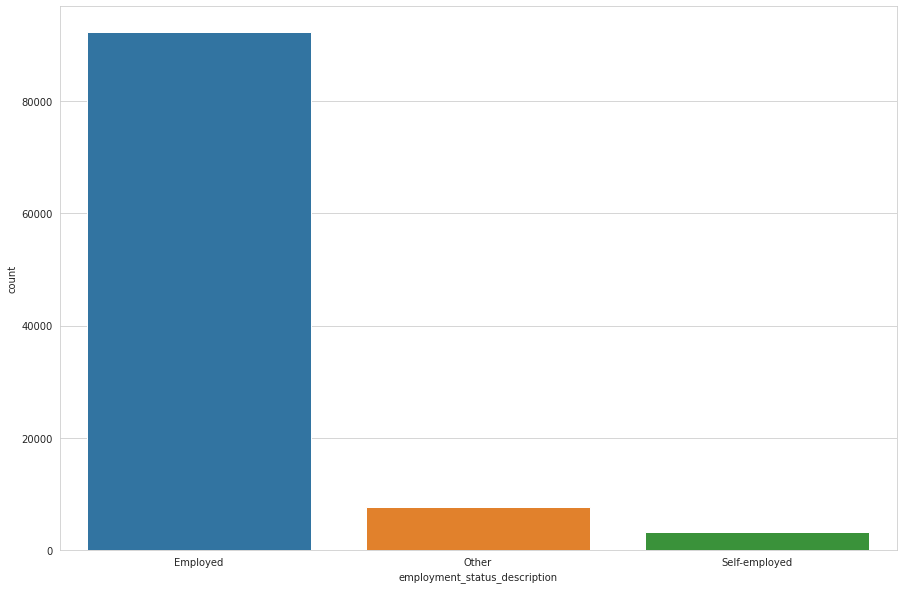

In [155]:
sns.countplot(train["employment_status_description"])

In [156]:
train.head(1)

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,loan_origination_date,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,scorex,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,...,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield
0,BFE35133851509F7BC64,11792740,2020-11-09 14:00:26.923000000,2020-11-09 14:01:26.670000000,2020-11-06 12:46:28.507000000,2020-11-10 00:00:00,6,Completed,6.0,Employed,339.0,4,700-719,CO,Loveland,1,False,2,18000.0,5746.78,4583.3333,0.0,Clerical,0.0,0.0,0.0,10000.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,16.0,16.0,0.0,...,-0.5,-3.0,291985.0,999.0,0.0,0.0,1.0,19.0,658.0,8.0,0.0,6318.0,3378.0,30.0,570.0,8.0,0.0,1532.0,1139.0,17086.0,44.0,170.0,0.0,0.0,25246.0,68343.0,2542.0,-1.0,663.0,1578.0,301.0,-4.0,1.0,84538.0,964.0,516.0,4786.0,227.0,104.0,0.1724


In [157]:
train.select_dtypes('O').columns

Index(['member_key', 'listing_start_date', 'listing_end_date',
       'listing_creation_date', 'loan_origination_date',
       'listing_status_reason', 'employment_status_description', 'TUFicoRange',
       'borrower_state', 'borrower_city', 'occupation'],
      dtype='object')

In [158]:
cat = ["listing_status_reason","employment_status_description"]#,"borrower_city" ]
for i in cat:
  print("-_______________________________-")
  print(train[i].unique())

-_______________________________-
['Completed' 'Cancelled' 'Expired' 'Withdrawn']
-_______________________________-
['Employed' 'Other' 'Self-employed']


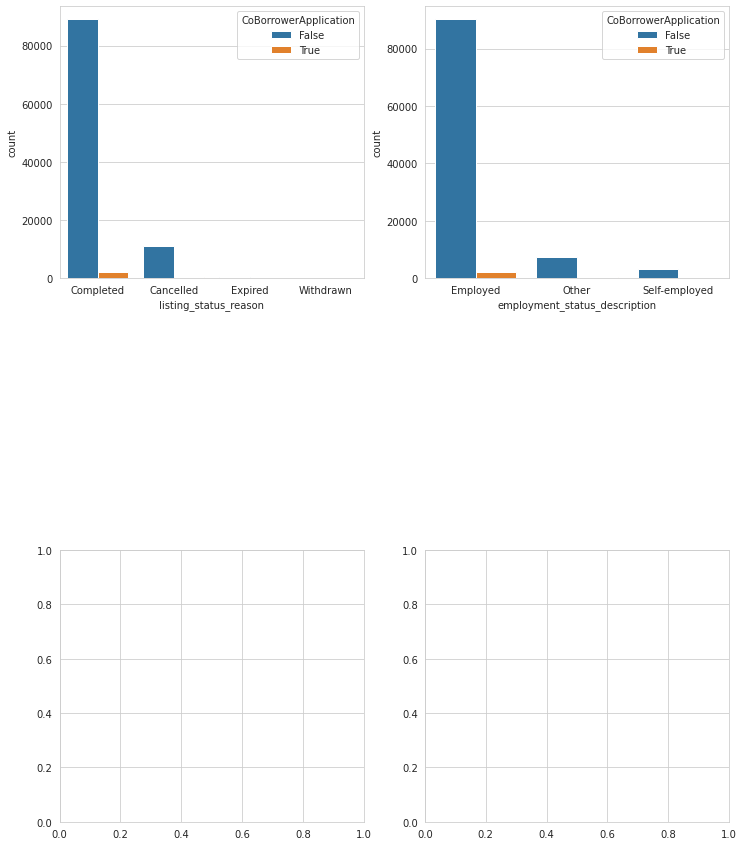

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(2,2,figsize=(12,15))
for idx,cat_col in enumerate(cat):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='CoBorrowerApplication',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

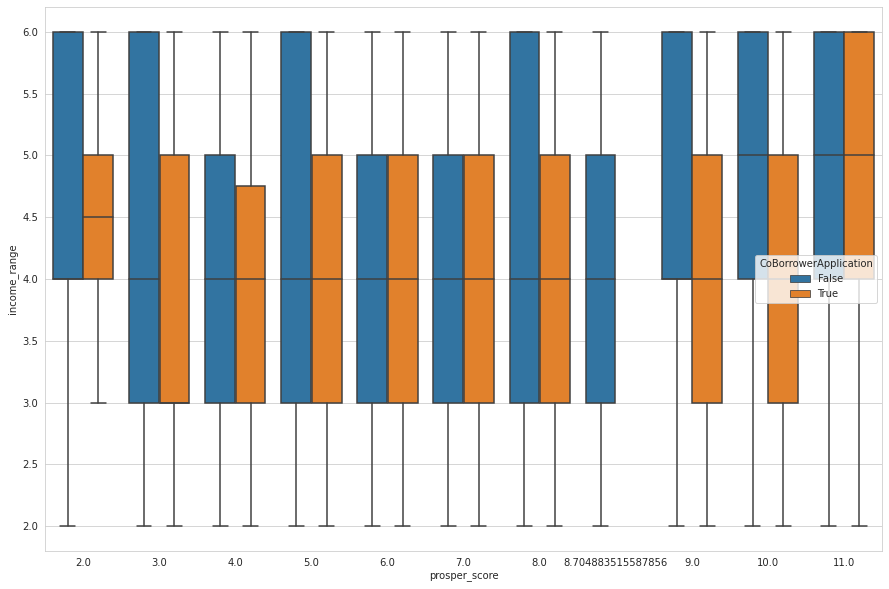

In [82]:
sns.boxplot(x="prosper_score", y='income_range', hue='CoBorrowerApplication', data=train)

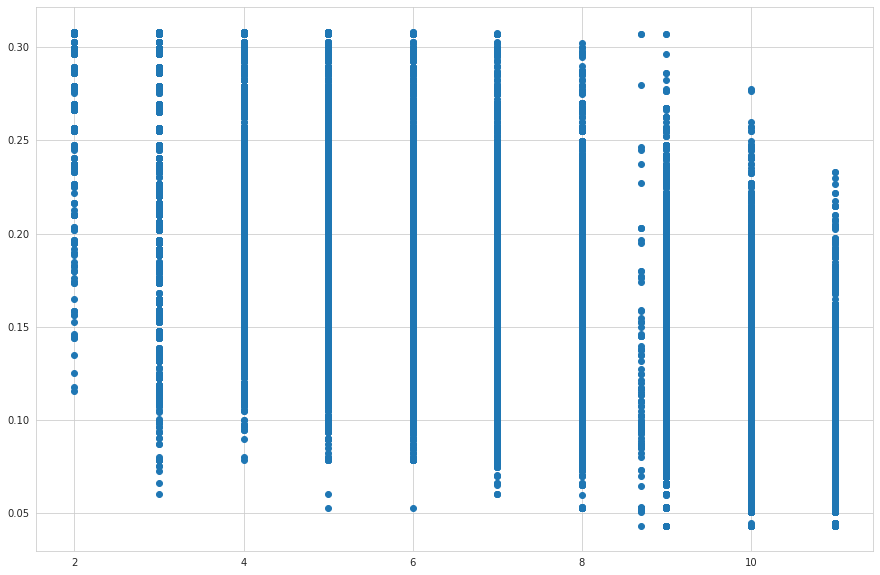

In [83]:
plt.scatter(x="prosper_score",y="lender_yield",data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


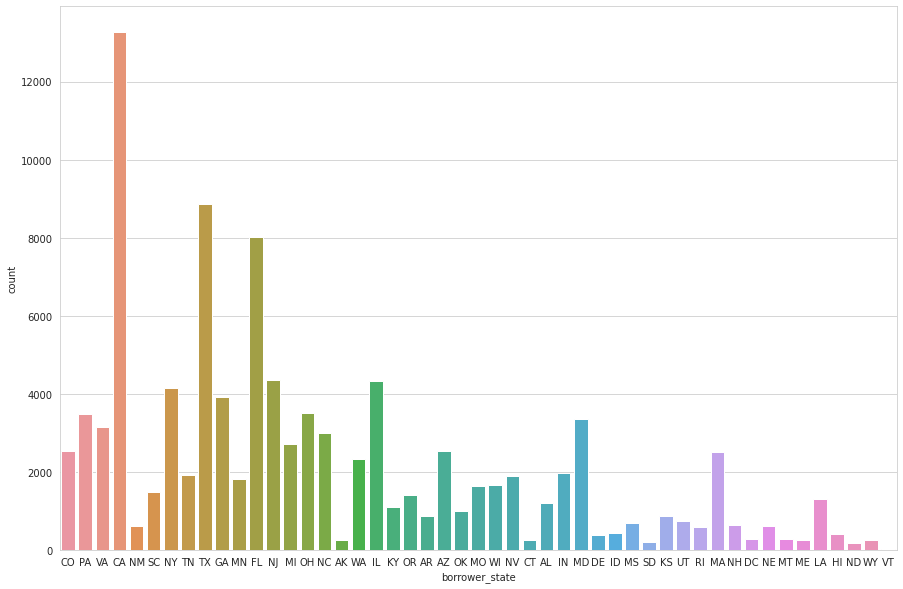

In [84]:
sns.countplot(train["borrower_state"])

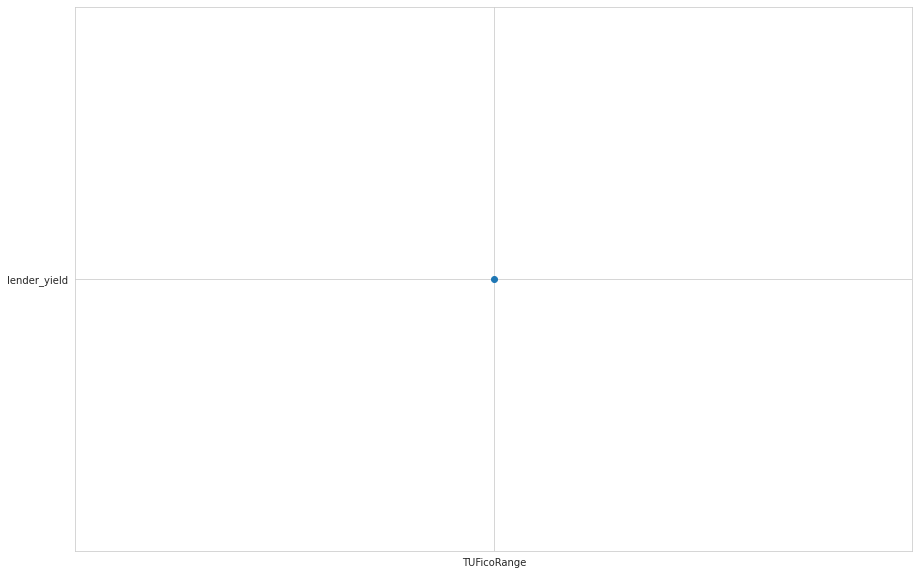

In [160]:
plt.scatter("TUFicoRange","lender_yield")

In [162]:
train["TUFicoRange"]

0         700-719
1         680-699
2         680-699
3         680-699
4         760-779
           ...   
103163    700-719
103164    640-659
103165    800-819
103166    680-699
103167    700-719
Name: TUFicoRange, Length: 103168, dtype: object

In [163]:
def ConvertFicoScore(x):
  ans = x.split("-")
  result = int(ans[1])/int(ans[0])
  return result

In [164]:
train["TUFicoRange"] = train["TUFicoRange"].apply(ConvertFicoScore)

In [244]:
test["TUFicoRange"] = test["TUFicoRange"].apply(ConvertFicoScore)

In [168]:
train["TUFicoRange"]

0         1.027143
1         1.027941
2         1.027941
3         1.027941
4         1.025000
            ...   
103163    1.027143
103164    1.029688
103165    1.023750
103166    1.027941
103167    1.027143
Name: TUFicoRange, Length: 103168, dtype: float64

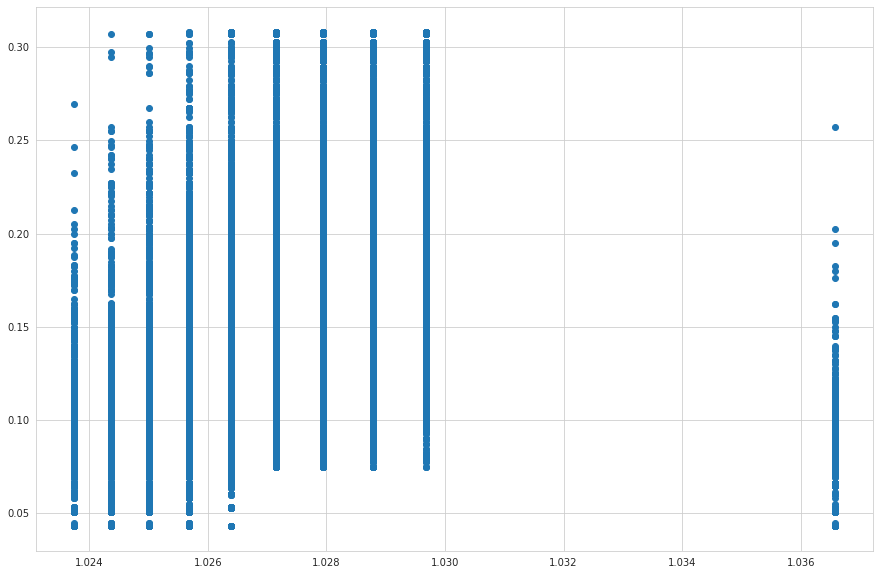

In [254]:
plt.scatter("TUFicoRange","lender_yield",data=train)

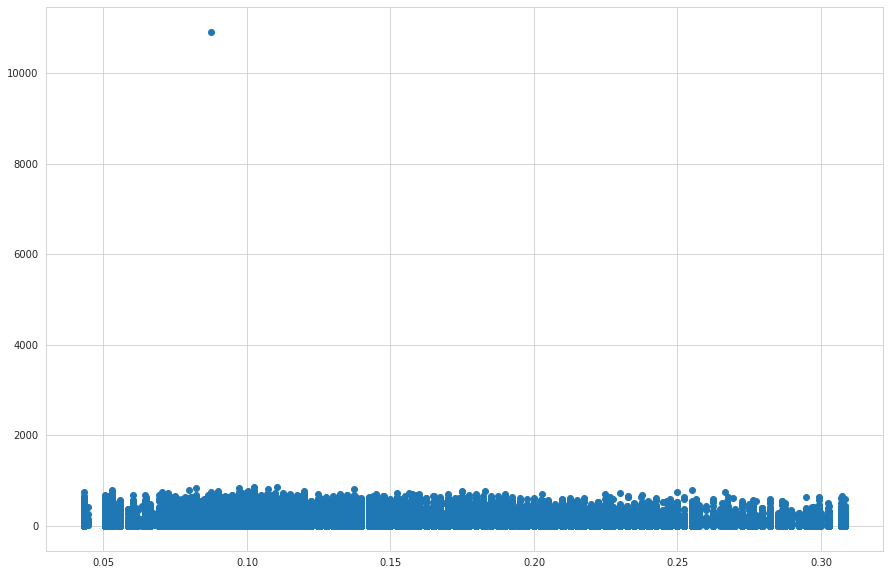

In [169]:
plt.scatter(x="lender_yield",y="months_employed",data=train)

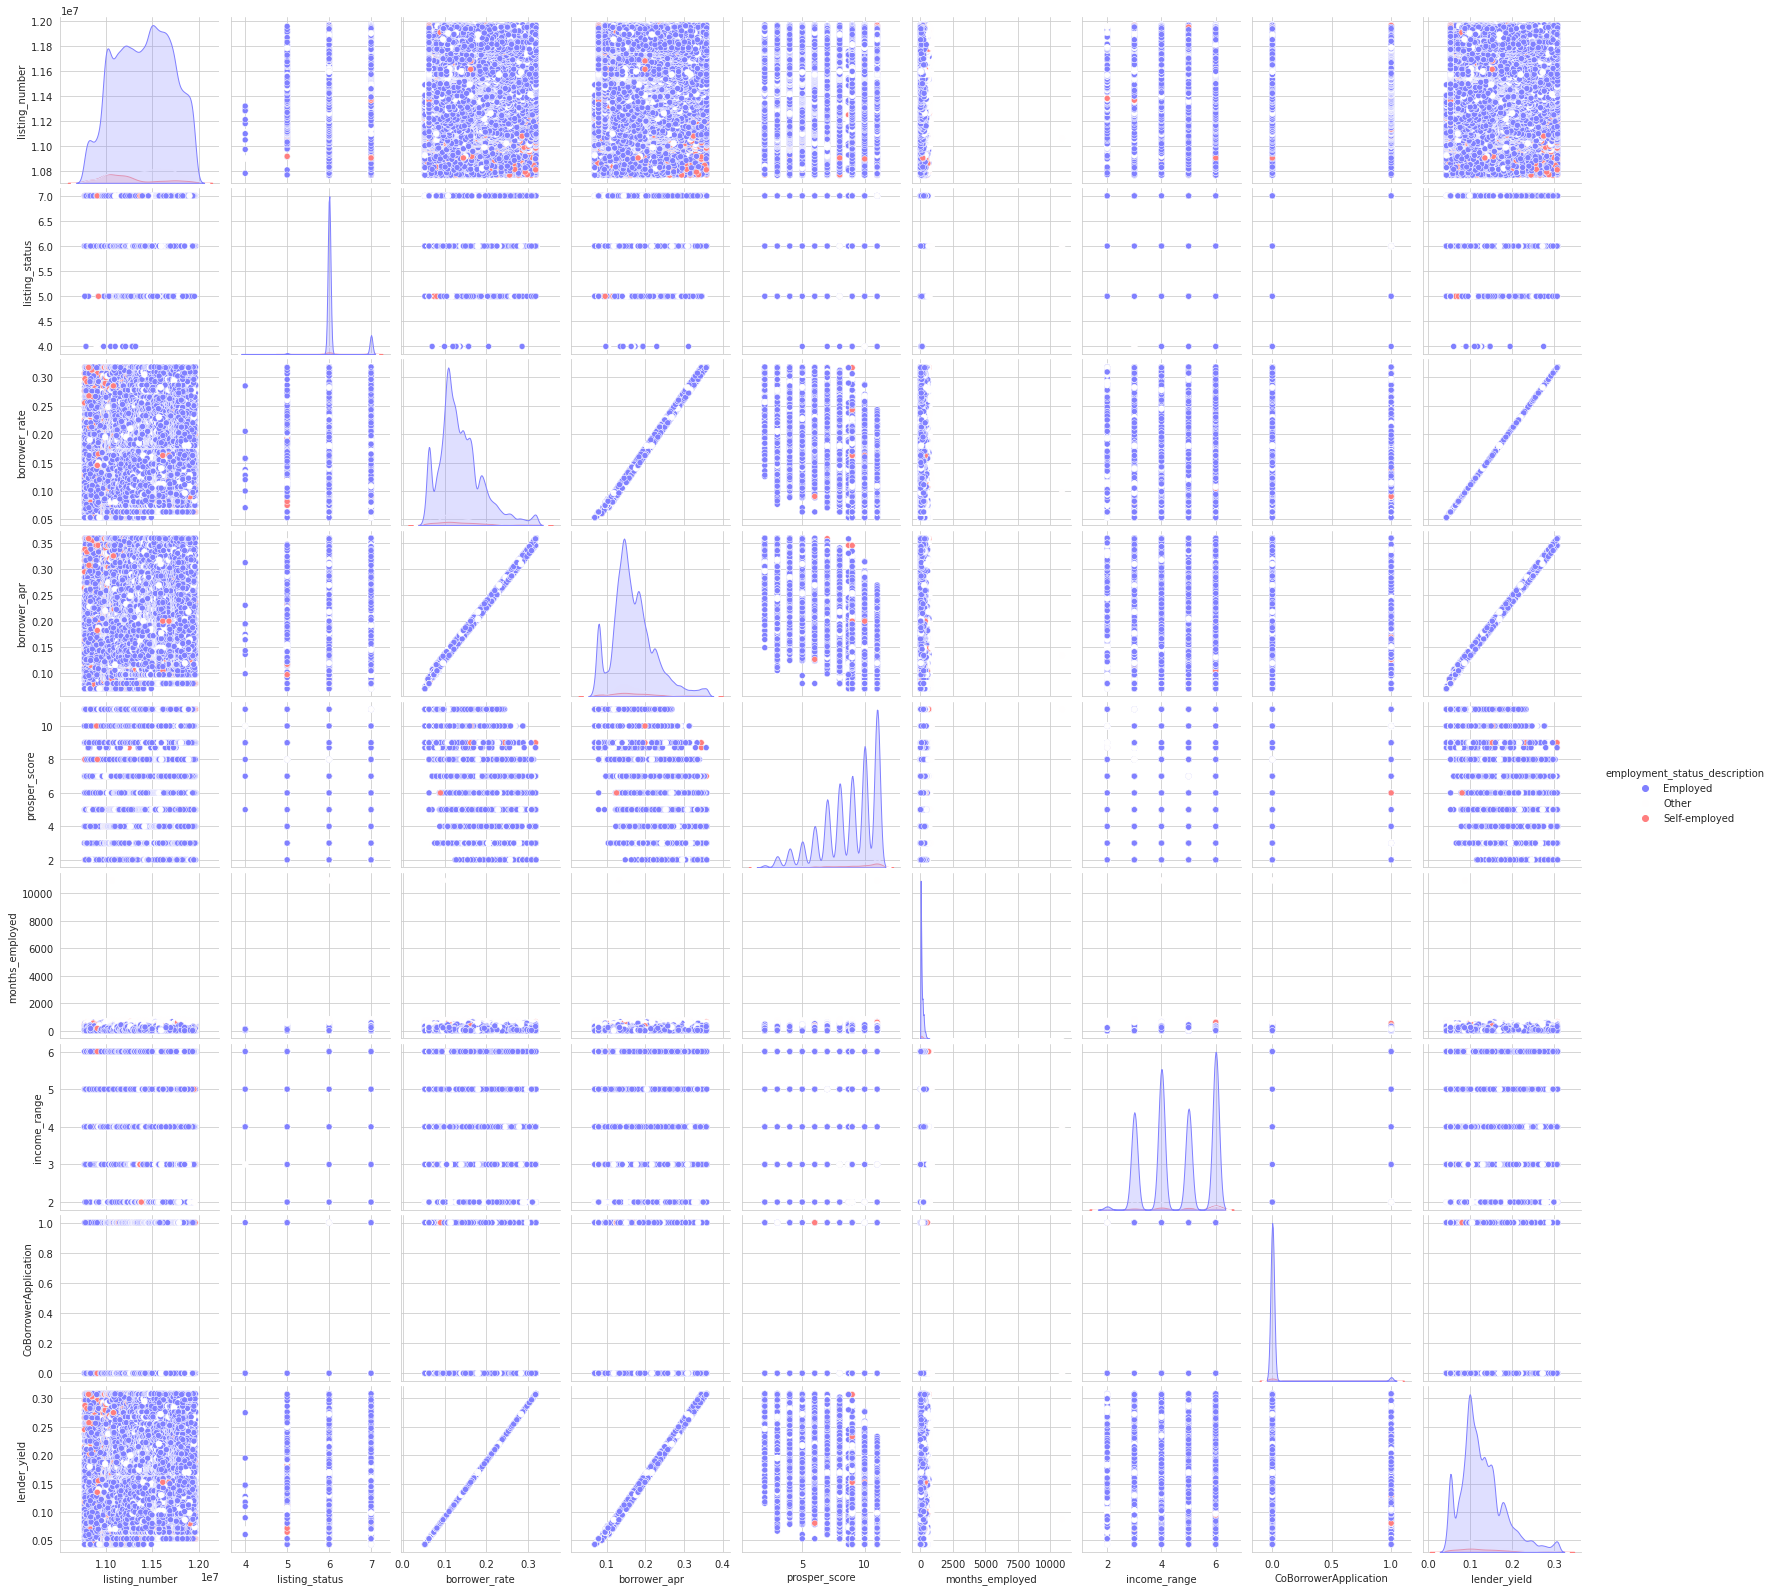

In [ ]:
sns.pairplot(train,hue='employment_status_description',palette='bwr')

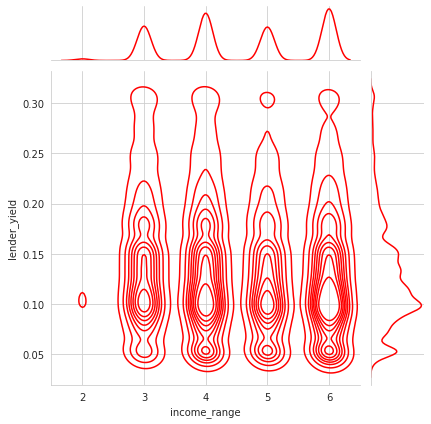

In [89]:
sns.jointplot(x='income_range',y='lender_yield',data=train,color='red',kind='kde');

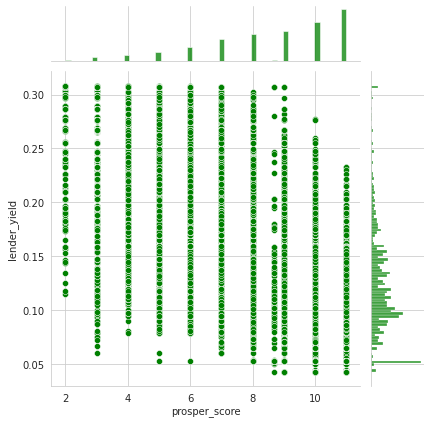

In [90]:
sns.jointplot(x='prosper_score',y='lender_yield',data=train,color='green')

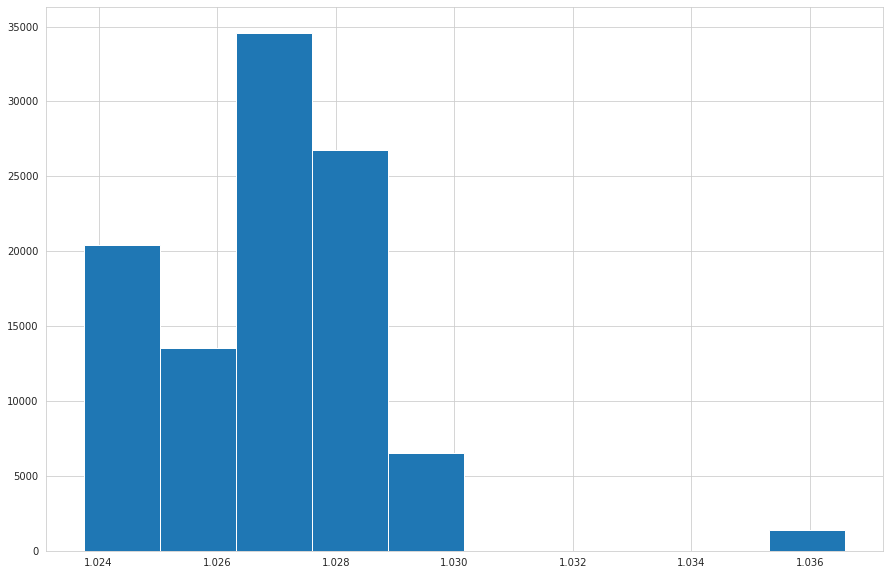

In [170]:
train["TUFicoRange"].hist()

In [175]:
train["scorex"].max()

0.0

In [176]:
train.drop("scorex",axis=1,inplace=True)

In [177]:
test.drop("scorex",axis=1,inplace=True)

In [178]:
train["prior_prosper_loans"].mean()

0.7749786755583127

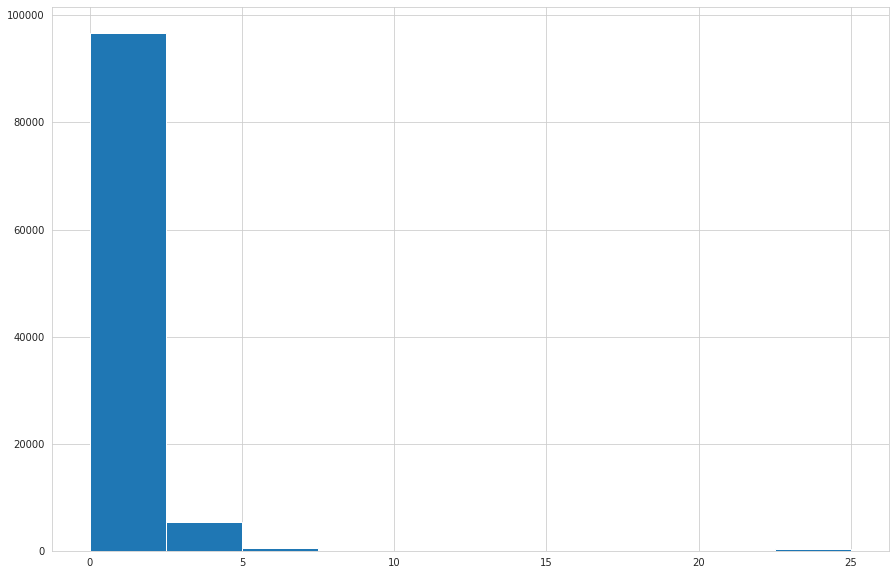

In [179]:
train["prior_prosper_loans"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


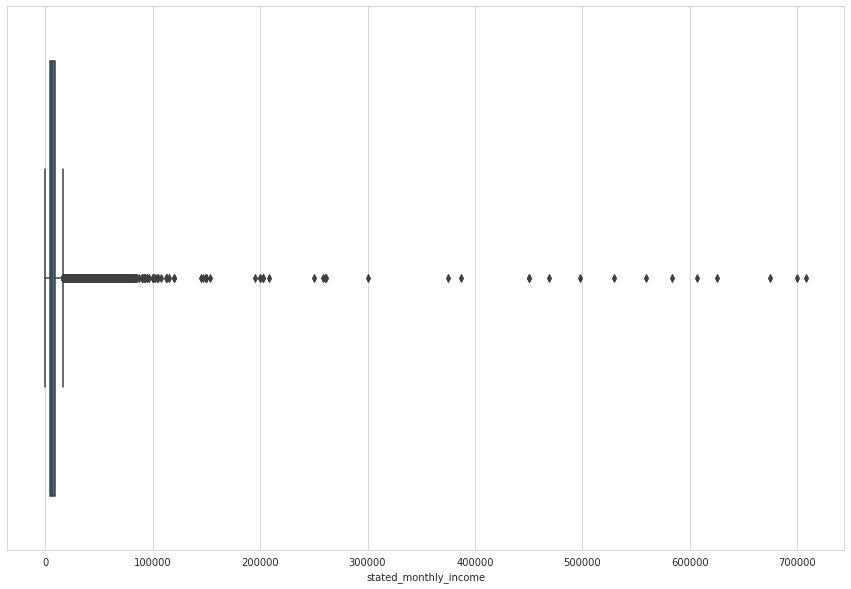

In [256]:
sns.boxplot(train["stated_monthly_income"])

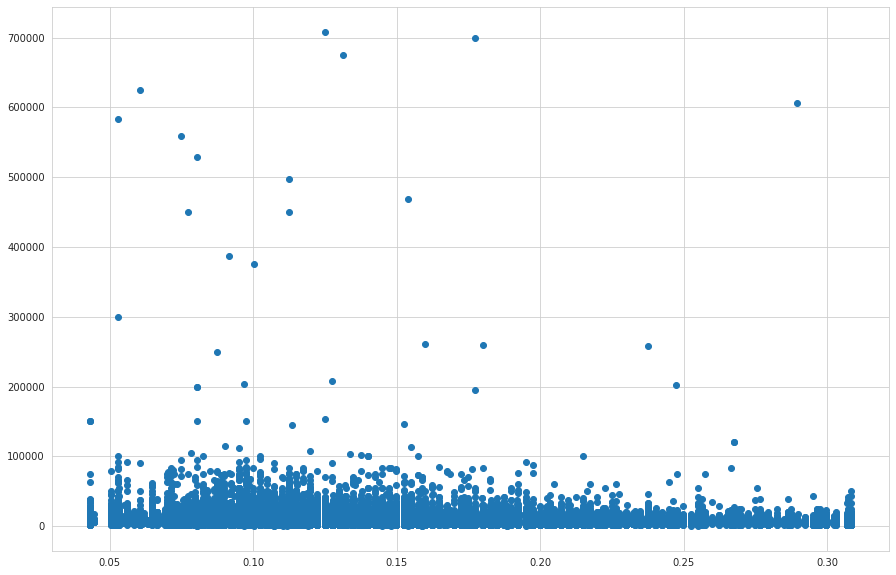

In [259]:
plt.scatter("lender_yield","stated_monthly_income",data=train)

Text(0, 0.5, 'FicoScore')

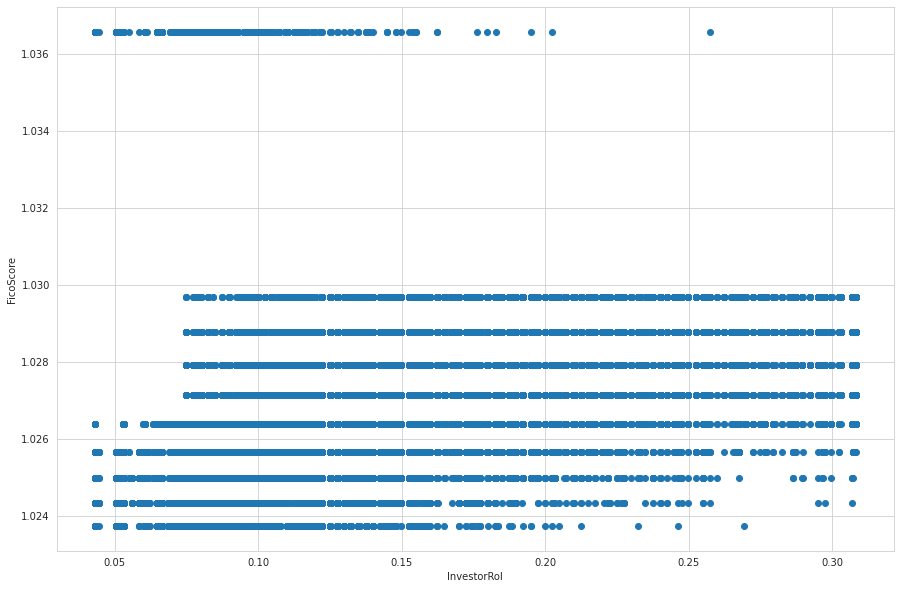

In [263]:
plt.scatter(train["lender_yield"],train["TUFicoRange"])
plt.xlabel("InvestorRoI")
plt.ylabel("FicoScore")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


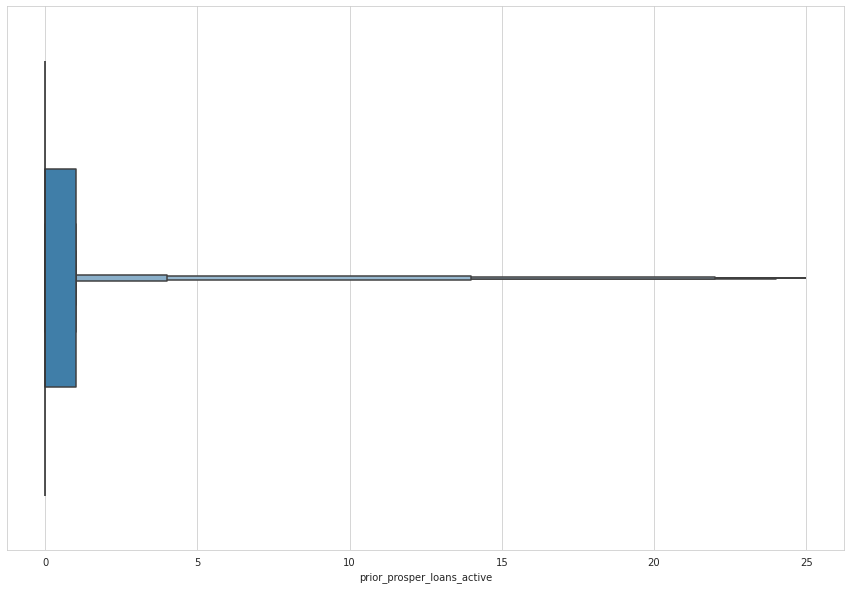

In [266]:
sns.boxenplot("prior_prosper_loans_active",data=train)

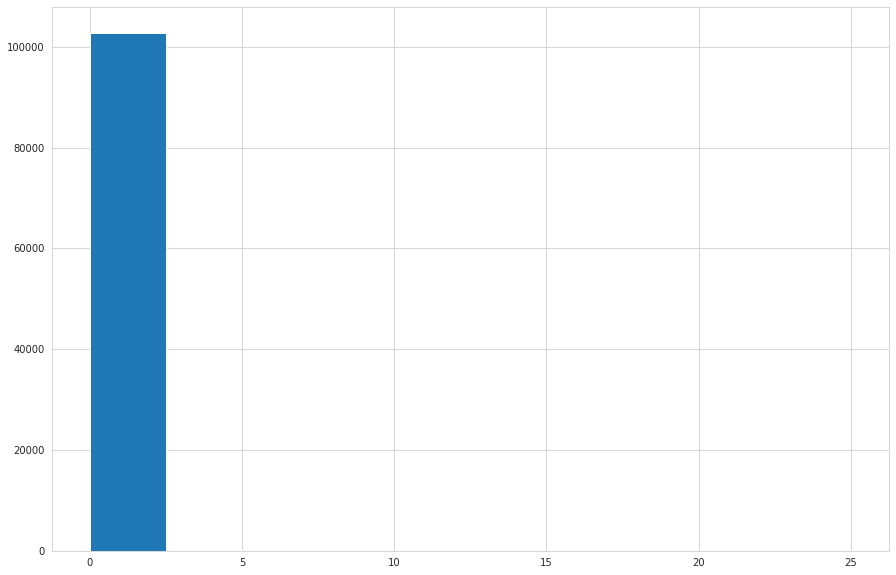

In [265]:
train["prior_prosper_loans_active"].hist()

In [250]:
train["stated_monthly_income"].mean()

7765.083187843108

In [251]:
train["lender_yield"].mean()

0.12799497421682118

Preprocessing

In [180]:
#the functions below are to extract date and time from the combined Date and Time columns
def ExtractDate(x):
  ans = x.split(" ")
  return ans[0]

def ExtractTime(x):
  ans = x.split(" ")
  return ans[1]

In [181]:
train["list_start_date"] = train["listing_start_date"].apply(ExtractDate)
test["list_start_date"] = test["listing_start_date"].apply(ExtractDate)
train["list_start_time"] = train["listing_start_date"].apply(ExtractTime)
test["list_start_time"] = test["listing_start_date"].apply(ExtractTime)

In [182]:
train.head(3)

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,loan_origination_date,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,...,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield,list_start_date,list_start_time
0,BFE35133851509F7BC64,11792740,2020-11-09 14:00:26.923000000,2020-11-09 14:01:26.670000000,2020-11-06 12:46:28.507000000,2020-11-10 00:00:00,6,Completed,6.0,Employed,339.0,4,1.027143,CO,Loveland,1,False,2,18000.0,5746.78,4583.3333,Clerical,0.0,0.0,0.0,10000.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,16.0,16.0,0.0,5.0,...,291985.0,999.0,0.0,0.0,1.0,19.0,658.0,8.0,0.0,6318.0,3378.0,30.0,570.0,8.0,0.0,1532.0,1139.0,17086.0,44.0,170.0,0.0,0.0,25246.0,68343.0,2542.0,-1.0,663.0,1578.0,301.0,-4.0,1.0,84538.0,964.0,516.0,4786.0,227.0,104.0,0.1724,2020-11-09,14:00:26.923000000
1,5EC41638536573FF4C50,11792743,2020-11-09 11:47:49.500000000,2020-11-09 11:50:06.830000000,2020-11-06 12:46:48.523000000,2020-11-10 00:00:00,6,Completed,9.0,Employed,134.0,4,1.027941,PA,Red Lion,0,False,1,20000.0,0.00,5833.3333,Other,0.0,0.0,0.0,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,14.0,14.0,0.0,5.0,...,140983.0,999.0,0.0,0.0,1.0,40.0,1139.0,999.0,0.0,13665.0,2833.0,74.0,1914.0,999.0,0.0,7655.0,2859.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2147.0,-1.0,458.0,1215.0,474.0,-4.0,-1.0,176420.0,2147.0,2086.0,6010.0,255.0,596.0,0.0974,2020-11-09,11:47:49.500000000
2,4CDA9349504903DF236,11805921,2020-11-09 11:48:52.527000000,2020-11-09 11:49:11.947000000,2020-11-06 12:48:59.127000000,2020-11-13 00:00:00,6,Completed,7.0,Employed,8.0,4,1.027941,VA,Richmond,0,False,1,6915.0,0.00,4999.6667,Other,0.0,0.0,0.0,6915.0,6915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0,1.0,2.0,...,-1.0,-1.0,-1.0,-1.0,0.0,78.0,1517.0,54.0,0.0,3034.0,1950.0,-3.0,-3.0,57.0,-3.0,-2.0,0.0,9456.0,53.0,-1.0,5.0,0.0,0.0,9456.0,715.0,-1.0,633.0,-1.0,82.0,-4.0,-7.0,30930.0,715.0,404.0,3034.0,82.0,-2.0,0.1324,2020-11-09,11:48:52.527000000


In [183]:
train.drop("listing_start_date",axis=1,inplace=True)
test.drop("listing_start_date",axis=1,inplace=True)

In [184]:
train["list_end_date"] = train["listing_end_date"].apply(ExtractDate)
test["list_end_date"]  = test["listing_end_date"].apply(ExtractDate)
train["list_end_time"] = train["listing_end_date"].apply(ExtractTime)
test["list_end_time"]  = test["listing_end_date"].apply(ExtractTime)

In [185]:
test.head()

,member_key,listing_number,listing_end_date,listing_creation_date,loan_origination_date,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,...,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,list_start_date,list_start_time,list_end_date,list_end_time
0,33AC39688222827E390,12427261,2021-07-22 14:08:27.880000000,2021-07-22 10:16:40.510000000,2021-02-17 00:00:00,7,Cancelled,9.0,Employed,6.0,3,740-759,IL,ROCKFORD,0,False,0,NaN,NaN,2666.6667,Self Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,14,14,1,3,14,...,-1,-1,-1,2,7,444,35,0,3555,6363,0,0,999,0,0,0,922,999,214,0,0,-5,4611,814,-1,689,-1,125,-4,-7,31972,814,689,3555,125,0,2021-07-22,14:01:34.677000000,2021-07-22,14:08:27.880000000
1,4C094351423072700370,12437697,2021-07-27 14:07:11.803000000,2021-07-22 10:14:40.853000000,2021-07-28 00:00:00,6,Completed,11.0,Employed,145.0,6,800-819,CA,Temecula,0,False,2,37600.0,0.0,13750.0000,Executive,NaN,NaN,NaN,20000.0,17600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25,11,11,0,5,11,...,999,0,0,0,0,24,999,0,194,13813,0,0,999,0,0,0,-1,-1,-1,-1,-1,-1,-1,3732,-1,2034,1683,15,-4,-1,450125,3732,15527,194,15,9306,2021-07-27,14:02:49.027000000,2021-07-27,14:07:11.803000000
2,27D32544574226266F6,12437757,2021-07-22 15:07:42.790000000,2021-07-22 10:47:19.107000000,2021-07-27 00:00:00,6,Completed,1.0,Employed,30.0,3,640-659,NV,NORTH LAS VEGAS,0,False,0,NaN,NaN,3333.3333,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,6,2,10,6,...,-1,-1,-1,0,61,433,999,0,1730,713,53,279,999,0,557,374,-1,-1,-1,-1,-1,-1,-1,593,-1,450,-1,143,-4,-1,4585,593,1128,1173,86,510,2021-07-22,15:00:30.887000000,2021-07-22,15:07:42.790000000
3,0D73-124519137994AAD2,11983349,2021-03-17 08:07:24.900000000,2021-03-16 12:12:14.507000000,2021-03-22 00:00:00,6,Completed,9.0,Employed,34.0,4,740-759,ID,Boise,0,True,0,NaN,NaN,4583.3333,Executive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,5,1,5,5,...,999,0,0,7,29,1450,999,0,1450,5000,-3,-3,999,-3,-2,0,10149,999,127,0,0,-5,10149,1715,-1,274,1325,29,-4,-1,257757,1715,1599,1450,29,0,2021-03-17,08:00:35.753000000,2021-03-17,08:07:24.900000000
4,D1B33746576749711046C8F,11983343,2021-03-22 14:07:33.877000000,2021-03-16 12:09:41.330000000,2021-03-23 00:00:00,6,Completed,8.0,Employed,116.0,6,720-739,NY,Ronkonkoma,1,False,2,55000.0,21709.2,10000.0000,Police Officer/Correction Officer,NaN,NaN,NaN,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,27,13,13,1,5,13,...,999,0,0,0,45,4434,999,0,44337,9959,67,7214,999,0,14427,11725,-3,999,-1,0,-3,-5,-2,4925,-1,1179,2617,1129,-4,-1,385703,4925,9036,29910,707,4633,2021-03-22,14:00:59.117000000,2021-03-22,14:07:33.877000000


In [186]:
train.drop("listing_end_date",axis=1,inplace=True)
test.drop("listing_end_date",axis=1,inplace=True)

In [187]:
train["list_creation_date"] = train["listing_creation_date"].apply(ExtractDate)
test["list_creation_date"]  = test["listing_creation_date"].apply(ExtractDate)
train["list_creation_time"] = train["listing_creation_date"].apply(ExtractTime)
test["list_creation_time"]  = test["listing_creation_date"].apply(ExtractTime)

In [188]:
train.drop("listing_creation_date",axis=1,inplace=True)
test.drop("listing_creation_date",axis=1,inplace=True)

In [189]:
train["loan_origin_date"] = train["loan_origination_date"].apply(ExtractDate)
test["loan_origin_date"] = test["loan_origination_date"].apply(ExtractDate)

In [191]:
train["total_open_revolving_accounts"].max()

0.0

In [192]:
train.drop("total_open_revolving_accounts",axis=1,inplace=True)

In [199]:
test.drop("total_open_revolving_accounts",axis=1,inplace=True)

In [193]:
train.describe()

,listing_number,listing_status,prosper_score,months_employed,income_range,TUFicoRange,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,AU20S,BC01S,BC02S,BC03S,BC06S,...,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,OF01S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield
count,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.0,103168.0,103168.0,103168.000000,103168.000000,103168.0,103168.0,103168.0,103168.0,103168.0,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,...,103168.000000,103168.000000,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,103168.000000,1.031680e+05,103168.000000,1.031680e+05,103168.000000,103168.000000,103168.000000,103168.000000
mean,1.139754e+07,6.105740,8.704884,111.405081,4.589504,1.026909,0.304125,0.774979,10634.621236,2637.404085,7765.083188,0.0,0.0,0.0,6463.914304,5122.336107,0.0,0.0,0.0,0.0,0.0,1.193985,0.003363,23.602774,12.075275,11.996317,0.823569,4.465425,11.982301,3.021034,0.747334,0.137698,-0.038665,0.397623,0.137659,86.604044,7.427322,5.313198,5.284294,0.289208,...,32.193839,33.082298,1.175036e+05,511.791864,-0.381892,7.920944,1.593372,35.926586,2139.266410,691.510972,2.069382,1.664602e+04,5940.092994,15.670964,558.679542,745.684999,-0.284730,1883.175364,1254.370435,7.494749e+03,348.900434,31.476078,0.568878,-0.723432,1074.088099,1.494927e+04,2864.338923,12.079957,849.398311,912.666990,413.539373,-3.634596,-1.352377,1.861701e+05,2181.044394,1.234145e+04,12668.946107,313.097840,540.428660,0.127995
std,3.021555e+05,0.326317,2.133344,117.445207,1.149179,0.001929,1.094088,1.767082,28695.530464,15124.314027,9136.100582,0.0,0.0,0.0,9372.685043,7800.225462,0.0,0.0,0.0,0.0,0.0,12.943654,0.060677,13.310202,6.500701,6.466782,1.053801,3.135350,6.459817,2.707673,0.993200,1.830900,0.493198,0.926876,1.830580,55.812465,4.984520,3.575926,3.584784,0.605610,...,43.668775,44.177035,1.533813e+05,495.923950,0.511207,789.413288,2.789757,24.539421,3337.741149,449.769389,626.353957,2.620548e+04,4840.058683,22.301921,1057.443715,427.439393,3.063828,3406.729814,2057.978166,2.446630e+04,473.853224,61.663002,10.248202,14.781843,9780.052158,3.992554e+04,5381.960623,104.298651,789.316070,1197.206488,431.924925,43.927163,2.424723,1.999879e+05,1828.233722,5.445423e+04,15893.476641,345.382896,1637.310136,0.053265
min,1.076351e+07,4.000000,2.000000,-1.000000,2.000000,1.023750,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-3.000000,-5.000000,-5.000000,-3.000000,-5.000000,0.000000,-1.000000,-3.000000,-1.000000,...,-3.000000,-3.000000,-3.000000e+00,-1.000000,-1.000000,-5.000000,0.000000,-3.000000,-3.000000,-1.000000,-3.000000

In [194]:
train["bankcard_utilization"].max()

0.0

In [195]:
train["revolving_balance"].max()

0.0

In [200]:
#dropping redundant columns
train.drop(["bankcard_utilization","revolving_balance"],axis=1,inplace=True)
test.drop(["bankcard_utilization","revolving_balance"],axis=1,inplace=True)

In [227]:

train.drop(["current_delinquencies"],axis=1,inplace=True)
test.drop(["current_delinquencies"],axis=1,inplace=True)

In [ ]:
train.drop(["delinquencies_last7_years","inquiries_last6_months","amount_delinquent","current_credit_lines","open_credit_lines"],axis=1,inplace=True)
test.drop(["delinquencies_last7_years","inquiries_last6_months","amount_delinquent","current_credit_lines","open_credit_lines"],axis=1,inplace=True)

In [196]:
#dropping duplicated columns if it exist
train = train.loc[:,~train.columns.duplicated()]
test = test.loc[:,~test.columns.duplicated()]

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103168 entries, 0 to 103167
Columns: 132 entries, member_key to loan_origin_date
dtypes: bool(1), float64(112), int64(5), object(14)
memory usage: 103.2+ MB


In [198]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80957 entries, 0 to 80956
Columns: 132 entries, member_key to loan_origin_date
dtypes: bool(1), float64(20), int64(96), object(15)
memory usage: 81.0+ MB


In [201]:
train.drop("loan_origination_date",axis=1,inplace=True)
test.drop("loan_origination_date",axis=1,inplace=True)

In [202]:
train.head()

,member_key,listing_number,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,TUFicoRange,borrower_state,borrower_city,prior_prosper_loans_active,CoBorrowerApplication,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,...,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield,list_start_date,list_start_time,list_end_date,list_end_time,list_creation_date,list_creation_time,loan_origin_date
0,BFE35133851509F7BC64,11792740,6,Completed,6.0,Employed,339.0,4,1.027143,CO,Loveland,1,False,2,18000.0,5746.78,4583.3333,Clerical,0.0,0.0,0.0,10000.0,8000.0,0.0,0.0,0.0,1.0,0.0,26.0,16.0,16.0,0.0,5.0,16.0,2.0,1.0,1.0,0.0,0.0,1.0,...,19.0,658.0,8.0,0.0,6318.0,3378.0,30.0,570.0,8.0,0.0,1532.0,1139.0,17086.0,44.0,170.0,0.0,0.0,25246.0,68343.0,2542.0,-1.0,663.0,1578.0,301.0,-4.0,1.0,84538.0,964.0,516.0,4786.0,227.0,104.0,0.1724,2020-11-09,14:00:26.923000000,2020-11-09,14:01:26.670000000,2020-11-06,12:46:28.507000000,2020-11-10
1,5EC41638536573FF4C50,11792743,6,Completed,9.0,Employed,134.0,4,1.027941,PA,Red Lion,0,False,1,20000.0,0.00,5833.3333,Other,0.0,0.0,0.0,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,25.0,14.0,14.0,0.0,5.0,14.0,3.0,1.0,1.0,0.0,1.0,1.0,...,40.0,1139.0,999.0,0.0,13665.0,2833.0,74.0,1914.0,999.0,0.0,7655.0,2859.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2147.0,-1.0,458.0,1215.0,474.0,-4.0,-1.0,176420.0,2147.0,2086.0,6010.0,255.0,596.0,0.0974,2020-11-09,11:47:49.500000000,2020-11-09,11:50:06.830000000,2020-11-06,12:46:48.523000000,2020-11-10
2,4CDA9349504903DF236,11805921,6,Completed,7.0,Employed,8.0,4,1.027941,VA,Richmond,0,False,1,6915.0,0.00,4999.6667,Other,0.0,0.0,0.0,6915.0,6915.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0,1.0,2.0,5.0,3.0,2.0,2.0,0.0,1.0,2.0,...,78.0,1517.0,54.0,0.0,3034.0,1950.0,-3.0,-3.0,57.0,-3.0,-2.0,0.0,9456.0,53.0,-1.0,5.0,0.0,0.0,9456.0,715.0,-1.0,633.0,-1.0,82.0,-4.0,-7.0,30930.0,715.0,404.0,3034.0,82.0,-2.0,0.1324,2020-11-09,11:48:52.527000000,2020-11-09,11:49:11.947000000,2020-11-06,12:48:59.127000000,2020-11-13
3,2541374793835134045AB2D,11805933,6,Completed,5.0,Other,398.0,5,1.027941,CA,CATHEDRAL CTY,1,False,2,17000.0,1303.24,6250.0000,Teacher,0.0,0.0,0.0,12000.0,5000.0,0.0,0.0,0.0,1.0,0.0,26.0,11.0,11.0,0.0,1.0,11.0,3.0,0.0,-3.0,0.0,0.0,-3.0,...,80.0,4431.0,999.0,0.0,43513.0,5528.0,53.0,2974.0,999.0,0.0,9582.0,5659.0,50035.0,999.0,123.0,0.0,0.0,-5.0,50035.0,1513.0,-1.0,163.0,-1.0,1350.0,-4.0,-1.0,95103.0,1513.0,1043.0,33931.0,1048.0,680.0,0.2174,2020-11-09,14:00:45.527000000,2020-11-09,14:01:26.583000000,2020-11-06,12:52:05.760000000,2020-11-10
4,95DE3430103568DDD710,11688122,7,Cancelled,8.0,Employed,52.0,3,1.025000,NM,LOS LUNAS,0,False,0,0.0,0.00,3166.6667,Military Enlisted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,...,26.0,1164.0,999.0,0.0,2327.0,4500.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,487.0,-1.0,445.0,-1.0,42.0,-4.0,-1.0,5001.0,487.0,445.0,2327.0,42.0,-2.0,0.1379,2020-12-09,08:00:55.467000000,2020-12-09,08:08:20.907000000,2020-12-08,07:14:11.217000000,2020-10-14


In [203]:
def ExtractMainTime(x):
  ans = x.split(".")
  #convert to seconds
  ftr = [3600,60,1]
  toseconds = sum([a*b for a,b in zip(ftr, map(int,ans[0].split(':')))])
  return toseconds

In [204]:
def ExtractDay(x):
  ans = x.split("-")
  return int(ans[2])

def ExtractMonth(x):
  ans = x.split("-")
  return int(ans[1])

In [205]:
train["list_start_time"] = train["list_start_time"].apply(ExtractMainTime)
test["list_start_time"] = test["list_start_time"].apply(ExtractMainTime)
train["list_end_time"] = train["list_end_time"].apply(ExtractMainTime)
test["list_end_time"] = test["list_end_time"].apply(ExtractMainTime)
train["list_creation_time"] = train["list_creation_time"].apply(ExtractMainTime)
test["list_creation_time"] = test["list_creation_time"].apply(ExtractMainTime)

In [206]:
train["list_start_day"] = train["list_start_date"].apply(ExtractDay)
test["list_start_day"] = test["list_start_date"].apply(ExtractDay)

In [207]:
#listing starts and end in the same month, even if they aren't, it will be close, which can cause too much correlation between both columns
train["list_start&end_month"] = train["list_start_date"].apply(ExtractMonth)
test["list_start&end_month"] = test["list_start_date"].apply(ExtractMonth)

In [208]:
train["list_end_day"] = train["list_end_date"].apply(ExtractDay)
test["list_end_day"] = test["list_end_date"].apply(ExtractDay)
train["list_creation_day"] = train["list_creation_date"].apply(ExtractDay)
test["list_creation_day"] = test["list_creation_date"].apply(ExtractDay)
train["loan_origin_day"] = train["loan_origin_date"].apply(ExtractDay)
test["loan_origin_day"] = test["loan_origin_date"].apply(ExtractDay)

In [209]:
train.drop(["list_start_date","list_end_date","list_creation_date","loan_origin_date"],axis=1,inplace=True)
test.drop(["list_start_date","list_end_date","list_creation_date","loan_origin_date"],axis=1,inplace=True)

In [210]:
train["listing_status_reason"]=train["listing_status_reason"].map(train["listing_status_reason"].value_counts().to_dict())
test["listing_status_reason"]=test["listing_status_reason"].map(test["listing_status_reason"].value_counts().to_dict())

In [211]:
train["borrower_state"]=train["borrower_state"].map(train["borrower_state"].value_counts().to_dict())
test["borrower_state"]=test["borrower_state"].map(test["borrower_state"].value_counts().to_dict())

In [212]:
train["employment_status_description"]=train["employment_status_description"].map(train["employment_status_description"].value_counts().to_dict())
test["employment_status_description"]=test["employment_status_description"].map(test["employment_status_description"].value_counts().to_dict())

In [213]:
train["borrower_city"]=train["borrower_city"].map(train["borrower_city"].value_counts().to_dict())
test["borrower_city"]=test["borrower_city"].map(test["borrower_city"].value_counts().to_dict())

In [214]:
train["occupation"]=train["occupation"].map(train["occupation"].value_counts().to_dict())
test["occupation"]=test["occupation"].map(test["occupation"].value_counts().to_dict())

In [215]:
train = pd.get_dummies(train, columns = ["CoBorrowerApplication"])
test = pd.get_dummies(test, columns = ["CoBorrowerApplication"])

In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103168 entries, 0 to 103167
Columns: 131 entries, member_key to CoBorrowerApplication_True
dtypes: float64(110), int64(18), object(1), uint8(2)
memory usage: 101.7+ MB


In [218]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80957 entries, 0 to 80956
Columns: 130 entries, member_key to CoBorrowerApplication_True
dtypes: float64(18), int64(108), object(2), uint8(2)
memory usage: 79.2+ MB


In [119]:
train.corr()

,listing_number,listing_status,listing_status_reason,prosper_score,employment_status_description,months_employed,income_range,borrower_state,borrower_city,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,stated_monthly_income,scorex,occupation,current_delinquencies,amount_delinquent,delinquencies_last7_years,max_prior_prosper_loan,min_prior_prosper_loan,inquiries_last6_months,current_credit_lines,open_credit_lines,revolving_balance,bankcard_utilization,total_open_revolving_accounts,prior_prosper_loans_ontime_payments,prior_prosper_loans31dpd,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AU01S,AU02S,AU03S,AU06S,AU09S,...,RE57S,RE101S,RE102S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,CV18,CV19,CV20,CV21,CV22,CV23,CV24,lender_yield,list_start_time,list_end_time,list_creation_time,list_start_day,list_start&end_month,list_end_day,list_creation_day,loan_origin_day,CoBorrowerApplication_False,CoBorrowerApplication_True
listing_number,1.000000,-0.026448,0.034749,0.103032,0.039999,0.003471,-0.052258,-0.001471,0.002226,0.010193,0.024674,0.014906,0.004695,-0.041403,NaN,-0.007861,NaN,NaN,NaN,0.026368,0.021344,NaN,NaN,NaN,NaN,NaN,NaN,-0.000048,0.003558,-0.000570,-0.006327,-0.005730,-0.104942,-0.034884,-0.005813,-0.028300,-0.029753,-0.027633,-0.010963,-0.027373,...,0.000073,-0.049282,-0.035013,-0.019365,-0.020932,0.004135,-0.006041,-0.025866,-0.023836,0.008957,0.007736,0.020727,0.005117,-0.003637,0.009251,0.011819,-0.046107,-0.019450,-0.056995,-0.062436,-0.059783,0.001313,0.011946,-0.035813,-0.078781,0.015188,-0.062304,-0.053557,-0.011374,-0.087855,0.089496,-0.005176,-0.014346,0.055019,0.890415,0.067822,0.074512,0.039839,-0.015885,0.015885
listing_status,-0.026448,1.000000,-0.874094,-0.039706,-0.052264,-0.036070,0.015072,0.027092,0.000662,-0.036481,-0.059679,-0.051309,-0.021655,0.059735,NaN,-0.008318,NaN,NaN,NaN,-0.092528,-0.084488,NaN,NaN,NaN,NaN,NaN,NaN,-0.012905,-0.007682,-0.022890,-0.002167,-0.002085,0.030885,0.030702,-0.002046,0.001333,0.012093,0.018558,-0.000133,0.010202,...,0.008529,0.001088,-0.021146,0.011651,-0.000072,-0.011303,-0.003916,0.001464,-0.000454,-0.010461,-0.025101,-0.023047,0.001876,0.000532,0.000180,-0.009395,-0.001895,0.000698,-0.012923,-0.033330,-0.003481,0.003129,0.002696,-0.001527,-0.029225,-0.012474,-0.004578,-0.006826,0.006181,0.051338,-0.045836,-0.055878,0.023448,0.000113,-0.030277,0.010203,-0.005140,-0.037047,-0.003761,0.003761
listing_status_reason,0.034749,-0.874094,1.000000,0.044721,0.059112,0.037583,-0.008669,-0.025334,0.000363,0.038601,0.064956,0.055280,0.022770,-0.062811,NaN,0.011186,NaN,NaN,NaN,0.097942,0.089008,NaN,NaN,NaN,NaN,NaN,NaN,0.015151,0.006688,0.024619,0.000319,0.000146,-0.035054,-0.038936,0.000126,0.001034,-0.012507,-0.021355,0.003494,-0.010413,...,-0.008461,-0.003204,0.022554,-0.009645,0.001180,0.013294,0.004411,-0.001574,-0.000013,0.014198,0.026477,0.026056,0.000118,-0.000227,0.002382,0.011995,0.003991,-0.001629,0.013289,0.036793,0.004760,-0.002954,-0.002188,0.001062,0.032076,0.012093,0.005426,0.008584,-0.009796,-0.065010,0.045671,0.057958,-0.025202,-0.007219,0.039022,-0.014758,0.001456,0.041659,0.022546,-0.022546
prosper_score,0.103032,-0.039706,0.044721,1.000000,-0.009095,0.044497,0.154444,0.014052,-0.006074,-0.001802,0.035606,0.054718,0.016392,0.080782,NaN,-0.000139,NaN,NaN,NaN,0.056980,0.044976,NaN,NaN,NaN,NaN,NaN,NaN,0.015402,-0.013598,0.104599,0.059106,0.059367,-0.065439,-0.052421,0.058472,0.062704,0.008547,-0.024310,0.014212,0.008137,...,0.000075,-0.048475,0.252916,-0.233822,-0.096778,0.104810,-0.037992,-0.120826,-0.091464,0.043010,0.076595,0.043007,-0.045350,-0.010218,-0.026566,0.035984,0.026212,0.009876,0.024220,0.142234,-0.140008,0.000887,-0.028948,0.133186,0.071345,0.068905,-0.074180,-0.125396,0.088596,-0.717045,-0.000202,0.011205,-0.003021,-0.001727,0.113458,-0.007861,0.001038,-0.017555,-0.037012,0.037012
employment_status_description

In [219]:
columns = train.columns

In [220]:
for i in range(131):
  print(columns[i])


member_key
listing_number
listing_status
listing_status_reason
prosper_score
employment_status_description
months_employed
income_range
TUFicoRange
borrower_state
borrower_city
prior_prosper_loans_active
prior_prosper_loans
prior_prosper_loans_principal_borrowed
prior_prosper_loans_principal_outstanding
stated_monthly_income
occupation
current_delinquencies
amount_delinquent
delinquencies_last7_years
max_prior_prosper_loan
min_prior_prosper_loan
inquiries_last6_months
current_credit_lines
open_credit_lines
prior_prosper_loans_ontime_payments
prior_prosper_loans31dpd
AT01S
AT02S
AT03S
AT06S
AT09S
AT12S
AU01S
AU02S
AU03S
AU06S
AU09S
AU12S
AU20S
BC01S
BC02S
BC03S
BC06S
BC09S
BC12S
CO01S
CO02S
CO03S
CO04S
CO05S
CO06S
CO07S
G001B
G002B
G003S
G020S
G041S
G042S
G043S
G051S
HI01S
HI02S
HI03S
HI06S
HI09S
HI12S
HI20S
HR01S
HR02S
HR03S
HR06S
HR09S
HR12S
HR20S
IN01S
IN02S
IN03S
IN06S
IN09S
IN12S
MT34B
MT34C
MT35S
MT36S
MT47S
MT57S
OF01S
RE34S
RE35S
RE36S
RE57S
RE101S
RE102S
RT34S
RT35S
RT36S
RT57S

In [236]:
train["prior_prosper_loans_active"].mean()

0.003363446029776675

In [223]:
train["prior_prosper_loans"].mean()

0.7749786755583127

In [237]:
train.drop(["member_key","listing_number"],axis=1,inplace=True)
test.drop(["member_key","listing_number"],axis=1,inplace=True)

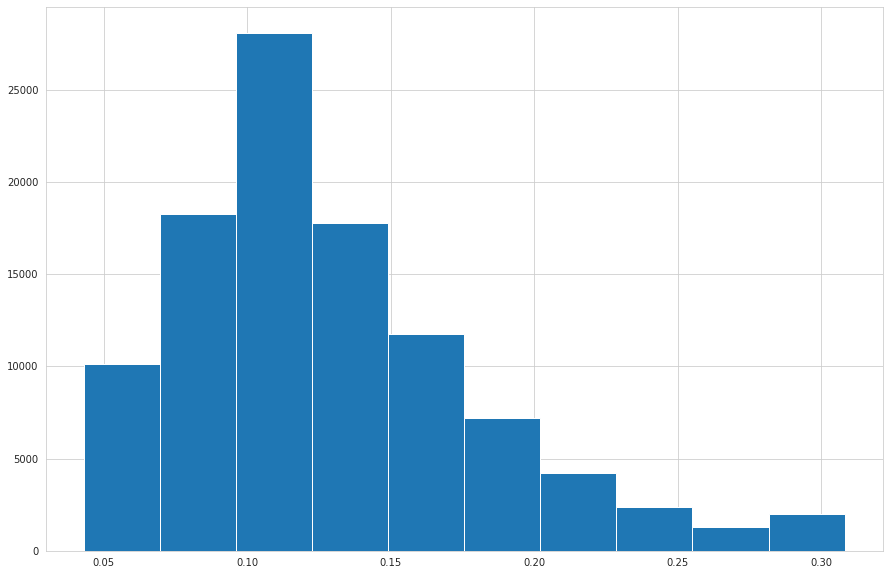

In [238]:
#checking the skewness of the target variable
train["lender_yield"].hist()

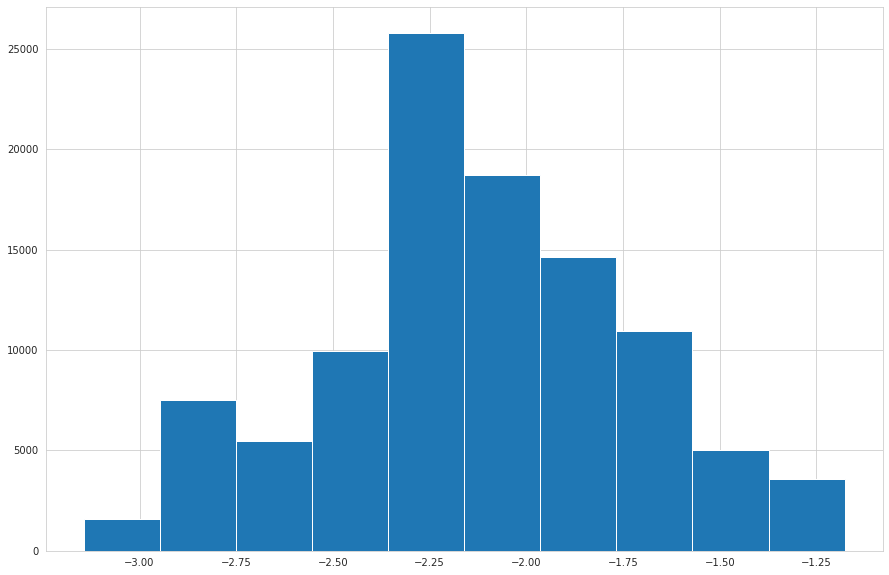

In [239]:
np.log(train["lender_yield"]).hist()

Train / Test Split

In [240]:
X=train.drop("lender_yield",axis=1)
y=train["lender_yield"]

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
y.head(2)

0    0.1724
1    0.0974
Name: lender_yield, dtype: float64

##Modelling(CatBoostRegressor) and Evaluation

In [128]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 23 kB/s 


In [129]:
from sklearn.metrics import mean_squared_error
def rmse(y_val,prediction):
    ans=np.sqrt(mean_squared_error(y_val,prediction))
    return ans

In [245]:
# %%time
testsplit_store=[]
test_store=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
from sklearn.metrics import mean_squared_error, f1_score, log_loss, roc_auc_score
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

oofs = np.zeros((len(X)))
y_oof = np.zeros((len(X)))
preds = np.zeros((len(test)))
errcb1=[]
y_pred_totcb1=[]

fold=KFold(n_splits=5)

i=1
for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_oof[test_index] = y_test
    
    cb_model = CatBoostRegressor(  iterations=5000,
                              learning_rate=0.3,
                              depth=4,
                             l2_leaf_reg=10,
                             bootstrap_type='Bernoulli',
                              subsample=0.7,
                              #leaf_estimation_iterations=10,
                              metric_period=20,
                              #od_type='Iter',
                              #od_wait=45,
                              # random_seed=42,
                              allow_writing_files=False,random_seed= 2021)
    
    cb_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300,verbose=500)
    preds=cb_model.predict(X_test)
    print("err: ",rmse(y_test,preds))
    errcb1.append(rmse(y_test,preds))
    p1 = cb_model.predict(test)
    y_pred_totcb1.append(p1)

0:	learn: 0.0447787	test: 0.0447787	test1: 0.0494755	best: 0.0494755 (0)	total: 36.1ms	remaining: 3m
500:	learn: 0.0298247	test: 0.0298247	test1: 0.0334539	best: 0.0334263 (399)	total: 14.8s	remaining: 2m 13s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.03342626411
bestIteration = 399

Shrink model to first 400 iterations.
err:  0.0334262641831102


0:	learn: 0.0450450	test: 0.0450450	test1: 0.0487014	best: 0.0487014 (0)	total: 35.3ms	remaining: 2m 56s
500:	learn: 0.0299540	test: 0.0299540	test1: 0.0329804	best: 0.0329770 (486)	total: 14.8s	remaining: 2m 12s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.03295442974
bestIteration = 588

Shrink model to first 589 iterations.
err:  0.03295442976873502


0:	learn: 0.0458109	test: 0.0458109	test1: 0.0455888	best: 0.0455888 (0)	total: 35.2ms	remaining: 2m 55s
500:	learn: 0.0301426	test: 0.0301426	test1: 0.0316557	best: 0.0316492 (482)	total: 14.9s	remaining: 2m 13s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.03160315832
bestIteration = 638

Shrink model to first 639 iterations.
err:  0.03160315830765098


0:	learn: 0.0468144	test: 0.0468144	test1: 0.0409004	best: 0.0409004 (0)	total: 36.1ms	remaining: 3m
500:	learn: 0.0305098	test: 0.0305098	test1: 0.0303484	best: 0.0303158 (307)	total: 14.8s	remaining: 2m 12s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.03031581043
bestIteration = 307

Shrink model to first 308 iterations.
err:  0.03031581040301523


0:	learn: 0.0462151	test: 0.0462151	test1: 0.0437277	best: 0.0437277 (0)	total: 34.3ms	remaining: 2m 51s
500:	learn: 0.0302343	test: 0.0302343	test1: 0.0315890	best: 0.0315845 (495)	total: 14.7s	remaining: 2m 12s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.0315801219
bestIteration = 518

Shrink model to first 519 iterations.
err:  0.031580121763825825


In [246]:
test_prediction  = np.round(np.mean(y_pred_totcb1, 0),4)

In [247]:
test_prediction[0]

0.1147

###Comparing predictions to ground truth(actual values) to see how well the model performs

In [133]:
act =  pd.read_csv("/content/drive/MyDrive/actual_values.csv")

In [134]:
act.head()

,lender_yield
0,0.1290
1,0.0714
2,0.2360
3,0.1279
4,0.0974


In [248]:
rmse(act["lender_yield"],test_prediction)

0.0382069655589976

This shows that the model performs very well

##Conclusion
the columns needed to get a decent predictions of ROI of an investor are
listing_number
listing_status
listing_status_reason
prosper_score
employment_status_description
months_employed
income_range
TUFicoRange
borrower_state
borrower_city
prior_prosper_loans_active
prior_prosper_loans
prior_prosper_loans_principal_borrowed
prior_prosper_loans_principal_outstanding
stated_monthly_income
occupation
delinquencies_last7_years
max_prior_prosper_loan
min_prior_prosper_loan
prior_prosper_loans_ontime_payments
prior_prosper_loans31dpd
AT01S
AT02S
AT03S
AT06S
AT09S
AT12S
AU01S
AU02S
AU03S
AU06S
AU09S
AU12S
AU20S
BC01S
BC02S
BC03S
BC06S
BC09S
BC12S
CO01S
CO02S
CO03S
CO04S
CO05S
CO06S
CO07S
G001B
G002B
G003S
G020S
G041S
G042S
G043S
G051S
HI01S
HI02S
HI03S
HI06S
HI09S
HI12S
HI20S
HR01S
HR02S
HR03S
HR06S
HR09S
HR12S
HR20S
